In [1]:
# HR Analytics: Job Change of Data Scientists: predict whether a Data Scientist will 
# look for a new job or continue to work for the present company

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Training dataset
df = pd.read_csv("aug_train.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


In [5]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

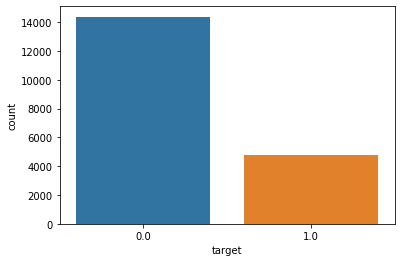

In [8]:
sns.countplot("target", data=df)

In [9]:
# This is an imbalaned dataset. This is obvious from this count plot of target 
# (1 = Looking for a job change, 0 =  Not looking for job change)

In [10]:
print(df.shape)

(19158, 14)


In [11]:
# Variables with missing value
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

In [12]:
vars_with_na

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [13]:
# Here all the variables with missing values are categorical variables

In [14]:
df[vars_with_na].isnull().mean()

gender                 0.235306
enrolled_university    0.020148
education_level        0.024011
major_discipline       0.146832
experience             0.003393
company_size           0.309949
company_type           0.320493
last_new_job           0.022080
dtype: float64

In [15]:
# All the numerical variables
num_vars = [var for var in df.columns if df[var].dtype != 'O']

In [16]:
num_vars

['enrollee_id', 'city_development_index', 'training_hours', 'target']

In [17]:
# All the categorical variables
cat_vars = [var for var in df.columns if df[var].dtype == 'O']

In [18]:
cat_vars

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [19]:
# Discrete variables
discrete_var = [var for var in num_vars if len(df[var].unique()) < 20]

In [20]:
discrete_var

['target']

In [21]:
# Continuous variables
cont_vars = [var for var in num_vars if not var in discrete_var]

In [22]:
cont_vars

['enrollee_id', 'city_development_index', 'training_hours']

In [23]:
df[cont_vars].head()

,enrollee_id,city_development_index,training_hours
0,8949,0.920,36
1,29725,0.776,47
2,11561,0.624,83
3,33241,0.789,52
4,666,0.767,8


In [24]:
def analyze_continuous(data, var):
    data = data.copy()
    plt.figure(figsize=(14,8))
    sns.countplot(x=var, hue='target', linewidth=10, data=data)
    plt.ylabel('Number of Data Scientists')
    plt.xlabel(var)
    plt.title(var)
    plt.show()

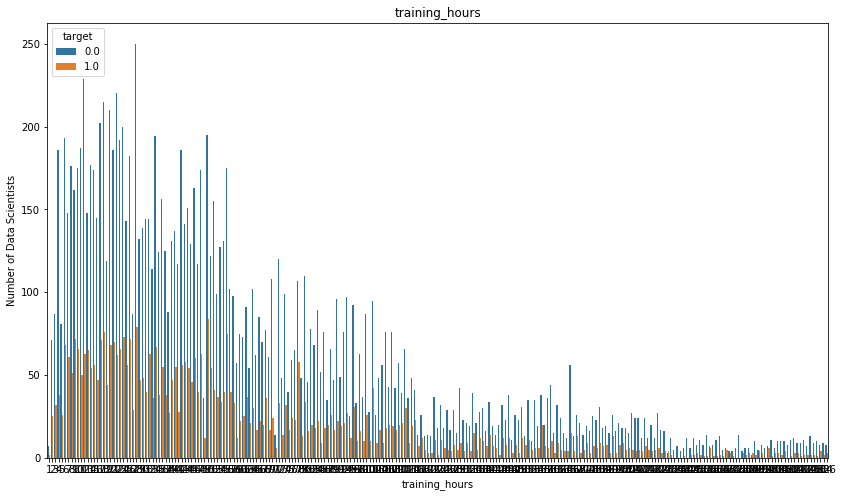

In [25]:
analyze_continuous(df,'training_hours')

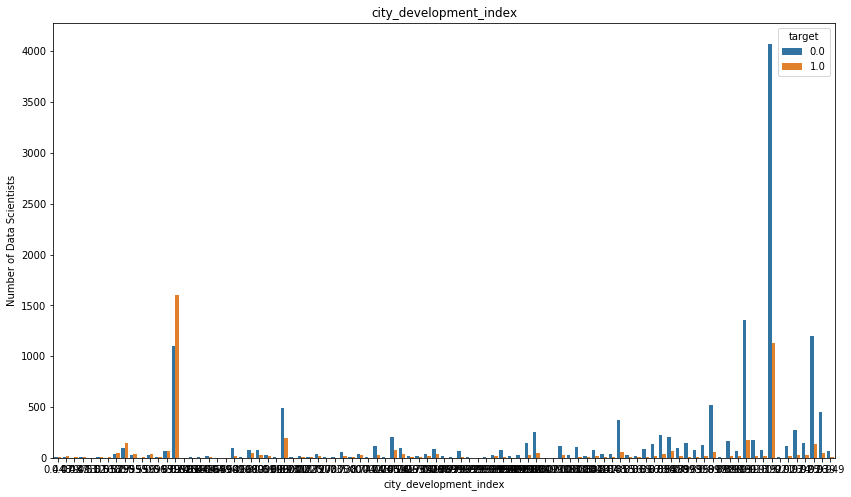

In [26]:
analyze_continuous(df,'city_development_index')

In [27]:
cat_vars

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [28]:
print('Number of categorical variables is {}'.format(len(cat_vars)))

Number of categorical variables is 10


In [29]:
df[cat_vars].head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4


In [30]:
# Number of labels: cardinality
df[cat_vars].nunique()

city                   123
gender                   3
relevent_experience      2
enrolled_university      3
education_level          5
major_discipline         6
experience              22
company_size             8
company_type             6
last_new_job             6
dtype: int64

In [31]:
# city has a very high cardinality and hence impractical to consider it for the current study. Other categorical variables 
# are fine.

In [32]:
# Rare labels

def analyze_rare_labels(data, var, rare_perc):
    data = data.copy()
    tmp = df.groupby(var)['target'].count()/len(data)
    return tmp[tmp < rare_perc]

In [33]:
for var in cat_vars:
    print(analyze_rare_labels(df, var, 0.01))
    print()

city
city_1      0.001357
city_10     0.004489
city_101    0.003915
city_105    0.004124
city_106    0.000470
              ...   
city_93     0.001357
city_94     0.001357
city_97     0.005429
city_98     0.004124
city_99     0.004907
Name: target, Length: 106, dtype: float64

gender
Other    0.00997
Name: target, dtype: float64

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

Series([], Name: target, dtype: float64)

experience
20    0.007725
Name: target, dtype: float64

Series([], Name: target, dtype: float64)

company_type
Other    0.006316
Name: target, dtype: float64

Series([], Name: target, dtype: float64)



In [34]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [35]:
# enrollee_id does not have significance for the prediction of dependent variable 'target', therefore we will drop it 
df.drop('enrollee_id', axis=1, inplace=True)

In [36]:
# city might be having some significance for the prediction of dependent variable 'target', but since the cardinality 
# is very high,  we will drop it 
df.drop('city', axis=1, inplace=True)

In [37]:
X_train = df

In [38]:
X_train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [39]:
X_train.shape

(19158, 12)

In [40]:
y_train = df['target']

In [41]:
y_train

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

In [42]:
# Missing values
# Categorical variables

vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0 and df[var].dtype == 'O']

In [43]:
# Missing values
# Categorical variables
vars_with_na

['gender',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [44]:
X_train[vars_with_na].isnull().mean()

gender                 0.235306
enrolled_university    0.020148
education_level        0.024011
major_discipline       0.146832
experience             0.003393
company_size           0.309949
company_type           0.320493
last_new_job           0.022080
dtype: float64

In [45]:
# Filling up the missing values with 'Missing'
X_train[vars_with_na] = X_train[vars_with_na].fillna('Missing')

In [46]:
X_train[vars_with_na].isnull().mean()

gender                 0.0
enrolled_university    0.0
education_level        0.0
major_discipline       0.0
experience             0.0
company_size           0.0
company_type           0.0
last_new_job           0.0
dtype: float64

In [47]:
# Test dataset
df_test = pd.read_csv("aug_test.csv")

In [48]:
df_test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [49]:
X_train = X_train.drop('target', axis=1)

In [50]:
X_train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Missing,Missing,1,36
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,0.624,Missing,No relevent experience,Full time course,Graduate,STEM,5,Missing,Missing,never,83
3,0.789,Missing,No relevent experience,Missing,Graduate,Business Degree,<1,Missing,Pvt Ltd,never,52
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


In [51]:
df_test.drop('enrollee_id', axis=1, inplace=True)

In [52]:
df_test.drop('city', axis=1, inplace=True)

In [53]:
X_test = df_test

In [54]:
X_test.shape

(2129, 11)

In [55]:
X_train.shape

(19158, 11)

In [56]:
X_test[vars_with_na].isnull().mean()

gender                 0.238610
enrolled_university    0.014561
education_level        0.024425
major_discipline       0.146548
experience             0.002349
company_size           0.292156
company_type           0.297792
last_new_job           0.018788
dtype: float64

In [57]:
# Filling up the missing values with 'Missing' for categorical variables 
X_test[vars_with_na] = X_test[vars_with_na].fillna('Missing')

In [58]:
X_test[vars_with_na].isnull().sum()

gender                 0
enrolled_university    0
education_level        0
major_discipline       0
experience             0
company_size           0
company_type           0
last_new_job           0
dtype: int64

In [59]:
vars_with_na_num = [var for var in X_train.columns if X_train[var].isnull().sum() > 0 and X_train[var].dtypes != 'O']

In [60]:
# There is no missing values for Numerical variables
vars_with_na_num

[]

In [61]:
X_train.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [62]:
X_test.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [63]:
y_train

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

In [64]:
# let's capture the categorical variables in a list

cat_vars = [var for var in X_train.columns if X_train[var].dtype == 'O']

In [65]:
cat_vars

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [66]:
X_train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Missing,Missing,1,36
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,0.624,Missing,No relevent experience,Full time course,Graduate,STEM,5,Missing,Missing,never,83
3,0.789,Missing,No relevent experience,Missing,Graduate,Business Degree,<1,Missing,Pvt Ltd,never,52
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


In [67]:
cat_vars

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [68]:
# Encoding categorical variables (creating dummy variables)
def create_dummy(data, var):
    data = data.copy()
    dummy = pd.get_dummies(data[var], drop_first=True)
    data = pd.concat([data, dummy], axis=1)
    return data

In [69]:
# Encoding categorical variables for the training set
for var in cat_vars:
    X_train = create_dummy(X_train, var)

In [70]:
X_train

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,...,NGO,Other,Public Sector,Pvt Ltd,2,3,4,>4,Missing,never
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Missing,Missing,1,...,0,0,0,0,0,0,0,0,0,0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,...,0,0,0,1,0,0,0,1,0,0
2,0.624,Missing,No relevent experience,Full time course,Graduate,STEM,5,Missing,Missing,never,...,0,0,0,0,0,0,0,0,0,1
3,0.789,Missing,No relevent experience,Missing,Graduate,Business Degree,<1,Missing,Pvt Ltd,never,...,0,0,0,1,0,0,0,0,0,1
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,Missing,Missing,1,...,0,0,0,0,0,0,0,0,0,0
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,Missing,Missing,4,...,0,0,0,0,0,0,1,0,0,0
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,...,0,0,0,1,0,0,1,0,0,0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,Missing,<1,500-999,Pvt Ltd,2,...,0,0,0,1,1,0,0,0,0,0


In [71]:
X_train.shape

(19158, 71)

In [72]:
# Encoding categorical variables for the test set
for var in cat_vars:
    X_test = create_dummy(X_test, var)

In [73]:
X_test.shape

(2129, 71)

In [74]:
pd.pandas.set_option('display.max_columns', None)

In [75]:
X_test.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Male,Missing,Other,No relevent experience,Missing,Part time course,no_enrollment,High School,Masters,Missing,Phd,Primary School,Business Degree,Humanities,Missing,No Major,Other,STEM,10,11,12,13,14,15,16,17,18,19,2,20,3,4,5,6,7,8,9,<1,>20,Missing,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10,Missing,Funded Startup,Missing,NGO,Other,Public Sector,Pvt Ltd,2,3,4,>4,Missing,never
0,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,Missing,1,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,Missing,Pvt Ltd,1,98,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0.624,Male,No relevent experience,no_enrollment,High School,Missing,<1,Missing,Pvt Ltd,never,15,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [76]:
X_train.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Male,Missing,Other,No relevent experience,Missing,Part time course,no_enrollment,High School,Masters,Missing,Phd,Primary School,Business Degree,Humanities,Missing,No Major,Other,STEM,10,11,12,13,14,15,16,17,18,19,2,20,3,4,5,6,7,8,9,<1,>20,Missing,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10,Missing,Funded Startup,Missing,NGO,Other,Public Sector,Pvt Ltd,2,3,4,>4,Missing,never
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Missing,Missing,1,36,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.624,Missing,No relevent experience,Full time course,Graduate,STEM,5,Missing,Missing,never,83,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
3,0.789,Missing,No relevent experience,Missing,Graduate,Business Degree,<1,Missing,Pvt Ltd,never,52,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [77]:
X_test.shape

(2129, 71)

In [78]:
X_train.shape

(19158, 71)

In [79]:
# Droping the original columns for categorical variables for the training set
X_train.drop(['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job'], axis=1, inplace=True)

In [80]:
X_train.shape

(19158, 62)

In [81]:
# Droping the original columns for categorical variables for the test set
X_test.drop(['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job'], axis=1, inplace=True)

In [82]:
X_test.shape

(2129, 62)

In [83]:
X_train.head()

,city_development_index,training_hours,Male,Missing,Other,No relevent experience,Missing,Part time course,no_enrollment,High School,Masters,Missing,Phd,Primary School,Business Degree,Humanities,Missing,No Major,Other,STEM,10,11,12,13,14,15,16,17,18,19,2,20,3,4,5,6,7,8,9,<1,>20,Missing,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10,Missing,Funded Startup,Missing,NGO,Other,Public Sector,Pvt Ltd,2,3,4,>4,Missing,never
0,0.920,36,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0.776,47,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.624,83,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
3,0.789,52,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,0.767,8,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [84]:
X_test.head()

,city_development_index,training_hours,Male,Missing,Other,No relevent experience,Missing,Part time course,no_enrollment,High School,Masters,Missing,Phd,Primary School,Business Degree,Humanities,Missing,No Major,Other,STEM,10,11,12,13,14,15,16,17,18,19,2,20,3,4,5,6,7,8,9,<1,>20,Missing,100-500,1000-4999,10000+,50-99,500-999,5000-9999,<10,Missing,Funded Startup,Missing,NGO,Other,Public Sector,Pvt Ltd,2,3,4,>4,Missing,never
0,0.827,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.920,98,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0.624,15,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,0.827,39,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.920,72,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


In [85]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [86]:
scaler = MinMaxScaler()

In [87]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
X_test

array([[0.75648703, 0.05970149, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.94211577, 0.28955224, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.35129741, 0.04179104, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.8762475 , 0.05074627, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.71057884, 0.24776119, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.71057884, 0.02985075, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [89]:
X_train

array([[0.94211577, 0.10447761, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.65469062, 0.13731343, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.35129741, 0.24477612, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.94211577, 0.12835821, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.70658683, 0.28656716, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.81237525, 0.3761194 , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [90]:
X_train.shape

(19158, 62)

In [91]:
X_test.shape

(2129, 62)

In [92]:
y_train.shape

(19158,)

In [93]:
# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [94]:
classifier = RandomForestClassifier(n_estimators=100)

In [95]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
y_pred_prob = classifier.predict_proba(X_test)

In [97]:
y_pred_prob

array([[0.95, 0.05],
       [0.82, 0.18],
       [0.79, 0.21],
       ...,
       [1.  , 0.  ],
       [0.85, 0.15],
       [0.93, 0.07]])

In [98]:
y_pred = classifier.predict(X_test)

In [99]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [100]:
y_pred_train = classifier.predict(X_train)

In [101]:
y_pred_train

array([1., 0., 0., ..., 0., 0., 0.])

In [102]:
y_train

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

In [103]:
from sklearn.metrics import confusion_matrix, classification_report

In [104]:
# Confusion matrix for the training set
cm_train = confusion_matrix(y_train, y_pred_train)

In [105]:
cm_train

array([[14368,    13],
       [   24,  4753]], dtype=int64)

In [106]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14381
         1.0       1.00      0.99      1.00      4777

    accuracy                           1.00     19158
   macro avg       1.00      1.00      1.00     19158
weighted avg       1.00      1.00      1.00     19158



In [107]:
from sklearn.metrics import roc_auc_score

In [108]:
# roc_auc_score for the training set
print(roc_auc_score(y_train, y_pred_train))

0.9970359778984661


In [109]:
# Target values of test set
y_test = np.load("jobchange_test_target_values.npy")

In [110]:
y_test

array([1., 0., 1., ..., 0., 0., 0.])

In [111]:
# Confusion matrix of test set
cm_test = confusion_matrix(y_test, y_pred)

In [112]:
cm_test

array([[1378,  175],
       [ 317,  259]], dtype=int64)

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      1553
         1.0       0.60      0.45      0.51       576

    accuracy                           0.77      2129
   macro avg       0.70      0.67      0.68      2129
weighted avg       0.75      0.77      0.76      2129



In [114]:
# roc_auc_score for the test set
print(roc_auc_score(y_test, y_pred))

0.6684838261071762


In [115]:
# Since it has performed poorly on the test set (especially for the target class 1.0 because of imbalanced training dataset),
# we have to fix the imbalanced training dataset using over sampling or under sampling or hybrid (combination of over sampling
# and under sampling).

In [116]:
# Applying over sampling and under sampling method on the training dataset
from collections import Counter

In [117]:
counter = Counter(y_train)

In [118]:
print(counter)

Counter({0.0: 14381, 1.0: 4777})


In [119]:
import imblearn
print(imblearn.__version__)

0.7.0


In [120]:
# Applying hybrid resampling (combination of over sampling and under sampling) on the training dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.7)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [121]:
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [122]:
counter = Counter(y_train)
print(counter)

Counter({0.0: 14380, 1.0: 10066})


In [123]:
X_train.shape

(24446, 62)

In [124]:
y_train.shape

(24446,)

In [125]:
X_train

array([[0.94211577, 0.53432836, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.20359281, 0.5761194 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75648703, 0.34328358, 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.54982135, 0.61982994, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.51871504, 0.05716389, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.36421245, 0.02311411, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [126]:
# Applying Random Forest Classifier on the modified training dataset
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [127]:
y_pred = classifier.predict(X_test)

In [128]:
# Confusion matrix of test set
cm_test = confusion_matrix(y_test, y_pred)

In [129]:
cm_test

array([[1327,  226],
       [ 283,  293]], dtype=int64)

In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84      1553
         1.0       0.56      0.51      0.54       576

    accuracy                           0.76      2129
   macro avg       0.69      0.68      0.69      2129
weighted avg       0.75      0.76      0.76      2129



In [131]:
# roc_auc_score for the test set
print(roc_auc_score(y_test, y_pred))

0.6815778824139658


In [132]:
y_pred_train = classifier.predict(X_train)

In [133]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14380
         1.0       1.00      1.00      1.00     10066

    accuracy                           1.00     24446
   macro avg       1.00      1.00      1.00     24446
weighted avg       1.00      1.00      1.00     24446



In [134]:
print(roc_auc_score(y_train, y_pred_train))

0.9984849990065567


In [135]:
# As we can see from the above that the results on the test set after resampling of training dataset (now, training dataset 
# is balanced) are better but there is a scope of improvement. We will try with XGBoost model.

In [136]:
# Applying XGBoost model.............
from sklearn import xgboost

In [137]:
classifier = xgboost.XGBClassifier(n_estimators=550, scale_pos_weight=1.9)
classifier.fit(X_train, y_train)

XGBClassifier(n_estimators=550, scale_pos_weight=1.9)

In [138]:
y_pred = classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred)

In [139]:
# Confusion matrix for the test set
cm_test

array([[1241,  312],
       [ 159,  417]], dtype=int64)

In [140]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84      1553
         1.0       0.57      0.72      0.64       576

    accuracy                           0.78      2129
   macro avg       0.73      0.76      0.74      2129
weighted avg       0.80      0.78      0.79      2129



In [141]:
# roc_auc_score for the test set
print(roc_auc_score(y_test, y_pred))

0.761528426164413


In [142]:
y_pred_train = classifier.predict(X_train)

In [143]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85     14380
         1.0       0.75      0.87      0.81     10066

    accuracy                           0.83     24446
   macro avg       0.83      0.84      0.83     24446
weighted avg       0.84      0.83      0.83     24446



In [144]:
# roc_auc_score for the training set
print(roc_auc_score(y_train, y_pred_train))

0.8371100735148024


In [145]:
# With resampling of the training data and XGBoost model, results on the test dataset and also traning dataset are much better.
# This is obvious from roc_auc_score and classification reports of the test set and also the traning set.